### 1. Import bibliotek
#### 🇬🇧 Import libraries

In [ ]:
!pip install detecto
# biblioteka, która będzie nam potrzebna do wytrenowania modelu

import torch
import matplotlib.pyplot as plt
import numpy as np
import os

from detecto import core, utils, visualize
from detecto.visualize import show_labeled_image, plot_prediction_grid
from torchvision import transforms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Badanie')
# łączymy się z dyskiem google

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2.Przygotowanie danych
#### 🇬🇧 Data preparation

In [ ]:
custom_transforms = transforms.Compose([
transforms.ToPILImage(),
transforms.Resize(900),
transforms.RandomHorizontalFlip(0.5),
transforms.ColorJitter(saturation=0.2),
transforms.ToTensor(),
utils.normalize_transform(),
])
# w tym miejscu określamy parametry zdjęć, na których będziemy pracować

### 3.Trenowanie modelu
#### 🇬🇧 Model training

In [ ]:
Train_dataset=core.Dataset('/content/drive/My Drive/Badanie/Train', transform=custom_transforms)
Test_dataset = core.Dataset('/content/drive/My Drive/Badanie/Test')
# ścieżki do folderów ze zdjęciami treningowymi i testowymi
loader=core.DataLoader(Train_dataset, batch_size=2, shuffle=True)
model = core.Model(["maseczka"]) # określamy ile mamy nazw obiektów oraz wpisujemy ich nazwy
losses = model.fit(loader, Test_dataset, epochs=5, lr_step_size=5, learning_rate=0.001, verbose=True)

Epoch 1 of 5
Begin iterating over training dataset


100%|██████████| 12/12 [00:08<00:00,  1.44it/s]


Begin iterating over validation dataset


100%|██████████| 5/5 [00:01<00:00,  4.61it/s]


Loss: 0.27600369453430174
Epoch 2 of 5
Begin iterating over training dataset


100%|██████████| 12/12 [00:08<00:00,  1.39it/s]


Begin iterating over validation dataset


100%|██████████| 5/5 [00:01<00:00,  4.69it/s]


Loss: 0.3254126042127609
Epoch 3 of 5
Begin iterating over training dataset


100%|██████████| 12/12 [00:08<00:00,  1.35it/s]


Begin iterating over validation dataset


100%|██████████| 5/5 [00:01<00:00,  4.45it/s]


Loss: 0.322752583026886
Epoch 4 of 5
Begin iterating over training dataset


100%|██████████| 12/12 [00:08<00:00,  1.39it/s]


Begin iterating over validation dataset


100%|██████████| 5/5 [00:01<00:00,  4.57it/s]


Loss: 0.29295083284378054
Epoch 5 of 5
Begin iterating over training dataset


100%|██████████| 12/12 [00:08<00:00,  1.48it/s]


Begin iterating over validation dataset


100%|██████████| 5/5 [00:01<00:00,  4.59it/s]

Loss: 0.2632144376635551


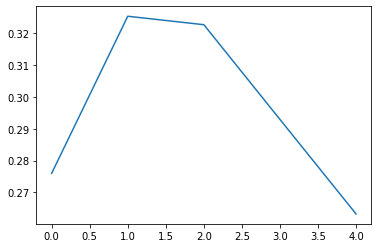

In [ ]:
plt.plot(losses)
plt.show()

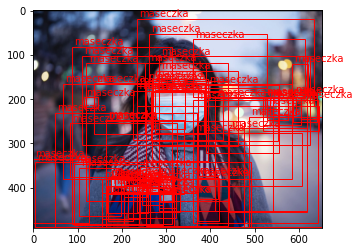

In [ ]:
image = utils.read_image("/content/drive/My Drive/Badanie/test.png")
predictions = model.predict(image)
labels, boxes, scores = predictions
show_labeled_image(image, boxes, labels)

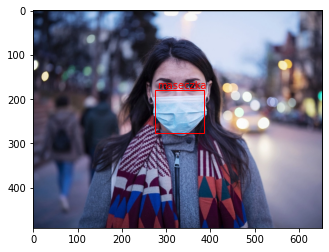

In [ ]:
thresh=0.4
filtered_indices=np.where(scores>thresh)
filtered_scores=scores[filtered_indices]
filtered_boxes=boxes[filtered_indices]
num_list = filtered_indices[0].tolist()
filtered_labels = [labels[i] for i in num_list]
show_labeled_image(image, filtered_boxes, filtered_labels)